In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.axelrod_second import (
    Champion,
    Borufsen,
    SecondByGraaskampKatzen,
    Leyvraz
)
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.tabular import TabularQLearner
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.tournament import RoundRobinTournament

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    Nydegger,
    TidemanAndChieruzzi,
    Champion,
    Borufsen,
    SecondByGraaskampKatzen,
    Grofman,
    Leyvraz,
])

In [3]:
class TabularLearnerTest(TabularQLearner):
    def __init__(self):
        super().__init__()
        self._lookback = 2
        self.epsilon = 0.1

agent = TabularLearnerTest()

In [4]:
env.train(
    trainee=agent,
    limit=200,
    epochs=2500,
)

[19:30:17] Commencement of training.
[19:30:18] Completed epoch 1: None
[19:30:18] Completed epoch 2: None
[19:30:18] Completed epoch 3: None
[19:30:18] Completed epoch 4: None
[19:30:18] Completed epoch 5: None
[19:30:18] Completed epoch 6: None
[19:30:18] Completed epoch 7: None
[19:30:18] Completed epoch 8: None
[19:30:18] Completed epoch 9: None
[19:30:18] Completed epoch 10: None
[19:30:18] Completed epoch 11: None
[19:30:18] Completed epoch 12: None
[19:30:18] Completed epoch 13: None
[19:30:18] Completed epoch 14: None
[19:30:18] Completed epoch 15: None
[19:30:18] Completed epoch 16: None
[19:30:18] Completed epoch 17: None
[19:30:18] Completed epoch 18: None
[19:30:18] Completed epoch 19: None
[19:30:18] Completed epoch 20: None
[19:30:18] Completed epoch 21: None
[19:30:18] Completed epoch 22: None
[19:30:18] Completed epoch 23: None
[19:30:18] Completed epoch 24: None
[19:30:18] Completed epoch 25: None
[19:30:18] Completed epoch 26: None
[19:30:18] Completed epoch 27: None


In [5]:
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

{<Action.COOPERATE: 0>: 3757897, <Action.DEFECT: 1>: 242103}
{<Action.COOPERATE: 0>: 0.93947425, <Action.DEFECT: 1>: 0.06052575}


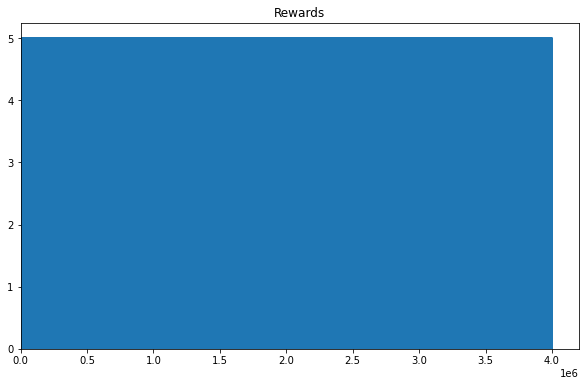

In [6]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

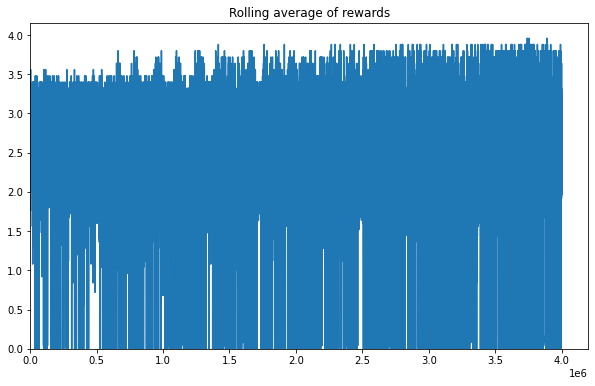

In [7]:
N = 25

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

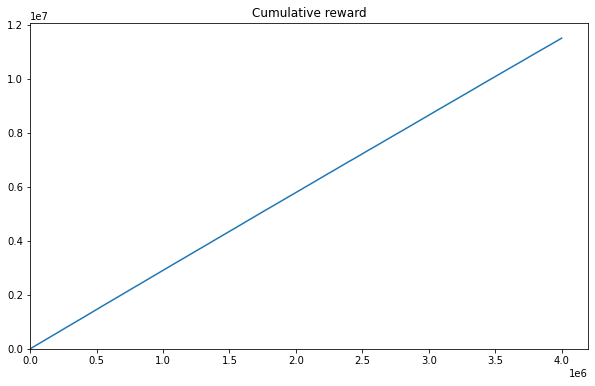

In [8]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

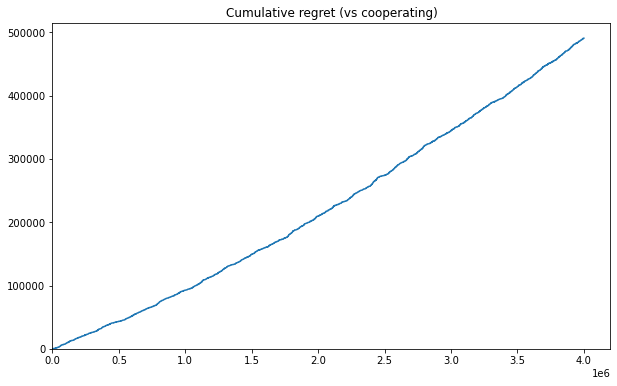

In [9]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

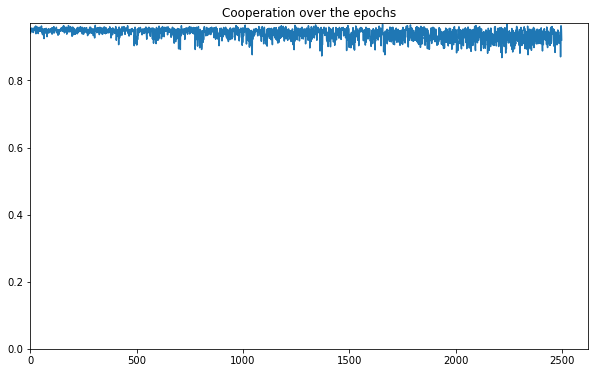

In [10]:
from tournament.action import Action

plt.title("Cooperation over the epochs")
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [11]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [00:24<00:00, 38.91matches/s] 

Shubik                         835                  5.157988            
Borufsen                       819                  6.2979460000000005  
SecondByTidemanAndChieruzzi    818                  7.301971000000003   
SecondByWeiner                 808                  16.567957           
Pavlov                         786                  5.072958            
TTFT                           781                  4.9470550000000015  
TidemanAndChieruzzi            781                  7.520952000000002   
TabularLearnerTest             779                  2.3019279999999998  
Champion                       775                  32.78704000000001   
Grofman                        774                  4.516014999999999   
Leyvraz                        773                  31.787031999999996  
TFTT                           765                  4.784988            
OmegaTFT                       763                  6.039022000000001   
SteinAndRapoport               759                 